# Self-avoiding random walks

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('science')
import numpy as np
from numpy.random import rand
import matplotlib as mpl
np.random.seed = 123

### Random walk on a lattice in 2d

In [2]:
def next_step(xa, xb, vis):
    da = [0,  0, -1, 1]
    db = [-1, 1,  0,  0]
    values = []
    for i in range(4):
        values += [(xa + da[i], xb + db[i])]
    vis_before = [_value in vis for _value in values]
    # Remove visited
    choices = [values[i] for i in range(4) if vis_before[i] == False]
    n = len(choices)
    if n == 0:
        return []
    else:
        index = np.random.choice(n, p = np.repeat(1/n, n))
        vis.add(choices[index])
        return choices[index]

In [3]:
# Self avoiding random walk with absorbing barriers
# (a,b) is the starting point of the random walker
def walk_2d(a, b, N = 10):
    steps = np.array([[a, b]])
    vis = set()
    vis.add((a, b))
    for i in range(N):
        x = steps[-1].flatten()
        xa, xb = x
        next = next_step(xa, xb, vis)
        if len(next) == 0:
            break
        else:
            steps = np.vstack((steps, next))
    return steps

In [4]:
walker_color = ["black", "red", "grey"]

In [5]:
def plot_walk(num_walkers = 1, start = (0, 0), N = 10, **args):
    figure = plt.figure(figsize=(5, 5))
    for i in range(num_walkers):
        w = walk_2d(start[0], start[1], N = N, **args)
        plt.plot(w[:, 0], w[:, 1], color=walker_color[i])
    plt.show()

**One random walker**

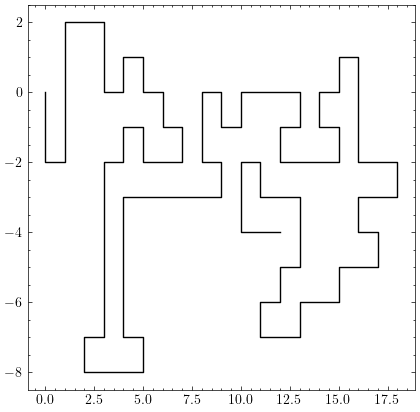

In [6]:
plot_walk(N = 1000)

**Two random walkers**

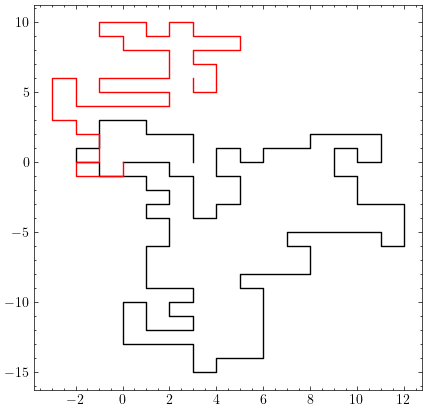

In [7]:
plot_walk(2, N = 1000)

**Three random walkers**

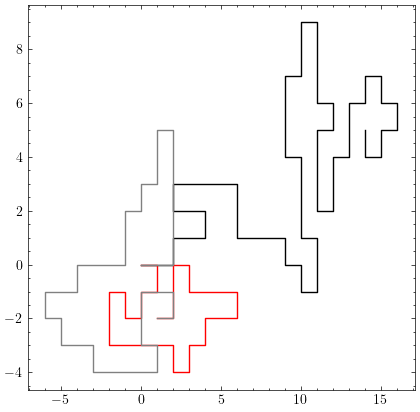

In [8]:
plot_walk(3, N = 1000)